In [1]:
from src.simulator import Simulator
from src.parameters import ModelParameters, MPCParameters

from src.controller import PID, MPC, LinearReferenceMPC
from src.plotter import Plotter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [3]:
m1 = 0.5
m2 = 0.5
L1 = 0.5
L2 = 0.5
l2 = 0.5*L2
l1 = 0.5*L1
I1 = m1*l1**2
I2 = m2*l2**2
f1 = 0.0
f2 = 0.0

model_params_sim = ModelParameters

model_params_sim.m1 = m1
model_params_sim.m2 = m2
model_params_sim.L1 = L1
model_params_sim.L2 = L2
model_params_sim.l1 = l2
model_params_sim.l2 = l1
model_params_sim.I1 = I1
model_params_sim.I2 = I2
model_params_sim.f1 = f1
model_params_sim.f2 = f2

In [4]:
sim = Simulator(dt=0.01)
sim.set_model_params(model_parameters=model_params_sim)

## MPC

In [5]:
mpc_params = MPCParameters

mpc_params.N = 50
mpc_params.dt = 0.01
mpc_params.u_lim = 8
mpc_params.max_iter = 50

# Same model for simulator and controller
model_params_mpc = model_params_sim

mpc = LinearReferenceMPC()
mpc.set_controller_params(controller_parameters=mpc_params)
mpc.set_model_params(model_parameters=model_params_mpc)

### Simulation

In [6]:
x0 = [np.pi, 0, 1, 0.1]
steps = 100

x_sim = np.ndarray((steps, 4))
x_sim[0] = x0

u_sim = np.ndarray(steps-1)

for i in range(steps-1):
  u_seq = mpc.update(x_sim[i])
  u = u_seq[0]
  
  u_sim[i] = u
  
  x_sim[i+1] = sim.simulate_step(x=x_sim[i], u=u)

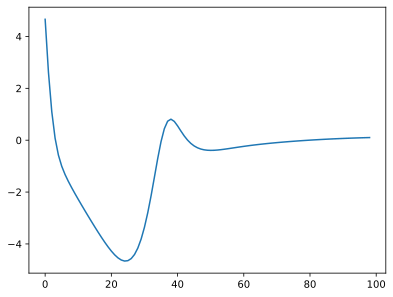

In [7]:
plt.plot(u_sim)

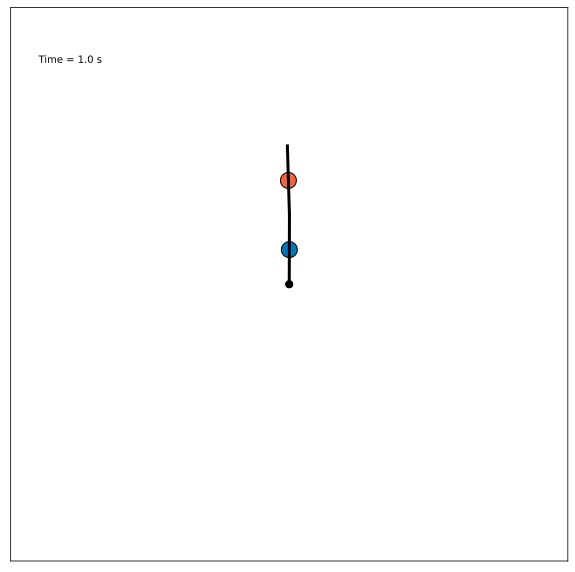

In [8]:
plotter = Plotter
plotter.animate_pendulum(x_sim[:,0], x_sim[:,1], model_params_sim.L1, model_params_sim.L2, dt=0.01)

## PID Controller

In [9]:
x0 = [3.14, 0, 0, 0]
steps = 400

x_sim = np.ndarray((steps, 4))
x_sim[0] = x0

u_sim = np.ndarray(steps)
e_sim = np.ndarray(steps)
de_sim = np.ndarray(steps)


controller = PID(Kp=100, Ki=0, Kd=-1)

reference = [np.pi, 0, 0, 0]

e_reference = 0
de_reference = 0


for i in range(steps-1):

  error = (reference[0] - x_sim[i, 0]) - (reference[1] - x_sim[i, 1])
  derror = de_reference - x_sim[i, 3]
  e_sim[i] = error
  de_sim[i] = derror
  
  u = controller.update(e=error, de=derror)
  u_sim[i] = u
  
  x_sim[i+1] = sim.simulate_step(x=x_sim[i], u=u)

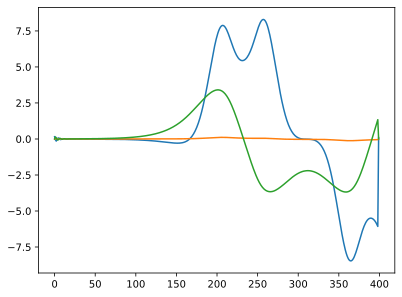

In [10]:
plt.plot(u_sim)
plt.plot(e_sim)
plt.plot(de_sim)

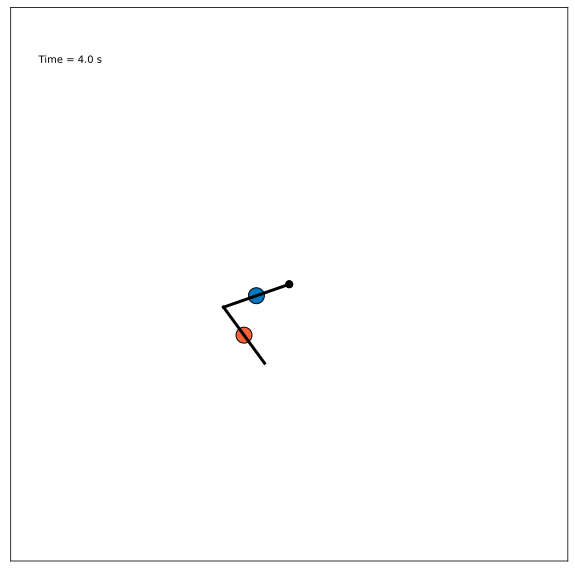

In [11]:
plotter = Plotter
plotter.animate_pendulum(x_sim[:,0], x_sim[:,1], model_params_sim.L1, model_params_sim.L2, dt=0.01)